# Análise Espacial

Fontes:

- [Shapefile Brasil - Unidades Federativas](http://www.usp.br/nereus/?fontes=dados-shape-files)
- [Sistema de Informações de Geração da ANEEL SIGA](https://app.powerbi.com/view?r=eyJrIjoiNjc4OGYyYjQtYWM2ZC00YjllLWJlYmEtYzdkNTQ1MTc1NjM2IiwidCI6IjQwZDZmOWI4LWVjYTctNDZhMi05MmQ0LWVhNGU5YzAxNzBlMSIsImMiOjR9)
- [Banco de dados do Governo](https://dados.gov.br/)

>Este projeto consiste em uma análise exploratória de dados. O objetivo desta análise é localizar as principais fontes geradoras de energia elétrica no Brasil e visualiza-la de forma espacial.

>O relatório padrão, disponibilizado no site da ANEEL de forma pública é o [Sistema de Informações de Geração da ANEEL (ANEEL SIGA)](https://app.powerbi.com/view?r=eyJrIjoiNjc4OGYyYjQtYWM2ZC00YjllLWJlYmEtYzdkNTQ1MTc1NjM2IiwidCI6IjQwZDZmOWI4LWVjYTctNDZhMi05MmQ0LWVhNGU5YzAxNzBlMSIsImMiOjR9). Os dados deste relatório, estão disponibilizados no [Banco de Dados do Governo Brasileiro](https://dados.gov.br/), onde foram extraídos e estudados. 

>Já os arquivos .shp utilziados, foram extraídos do banco de dados da USP, contendo os [Shapefiles do Brasil por unidades federativas](http://www.usp.br/nereus/?fontes=dados-shape-files)

## Códigos

### Importação de arquivos

In [331]:
# Realizando a importação das bibliotecas

import pandas as pd
import numpy as np
import chardet
import os
import geopandas as gpd
import folium
from branca.element import Template, MacroElement

In [264]:
# Determinando o caminho onde estão os arquivos a serem trabalhados

patch = "C:\\Users\\vinic\\Downloads\\siga-empreendimentos-geracao.csv"

# Verificando a extensão do arquivo importado

import chardet
with open(patch, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

print(result)

# Uma vez verificado que o arquivo está em UTF-16, deve-se especifica-lo na funçao do pandas "pd.read_csv"

df_ini = pd.read_csv(patch, sep= ";", header=0, decimal= ',',encoding="utf-16" )

# Visualizando o df_ini

df_ini

{'encoding': 'UTF-16', 'confidence': 1.0, 'language': ''}


,DatGeracaoConjuntoDados,IdcGeracaoQualificada,NomEmpreendimento,CodCEG,SigUFPrincipal,DscAbreviacaoTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,DscTipoOutorga,...,MdaPotenciaOutorgadaKw,MdaPotenciaFinalizadaKw,MdaGarantiaFisicaKw,NumLatitude,NumLongitude,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios
0,2022-03-01,Não,14 de Julho,UHE.EP.RS.000012-4,RS,UHE,Operação,Hídrica,Potencial hidráulico,Concessão,...,100000.0,100000,47500.0,-29.06,-51.67,15-03-2001,15-03-2036,100% para COMPANHIA ENERGÉTICA RIO DAS ANTAS (...,86 - Taquari,"Bento Gonçalves - RS, Cotiporã - RS"
1,2022-03-01,Não,29 de Outubro,UTE.EP.SC.029920-0,SC,UTE,Operação,Fóssil,Petróleo,Registro,...,62.0,62,0.0,-26.48,-49.08,01-01-1900,01-01-1900,100% para Condomínio Residencial 29 de Outubro...,NaN,Jaraguá do Sul - SC
2,2022-03-01,Não,3 Tentos Ijuí,UTE.EF.RS.048608-6,RS,UTE,Construção,Biomassa,Floresta,Autorização,...,5500.0,0,0.0,-28.42,-53.91,05-07-2021,05-07-2056,100% para TRÊS TENTOS AGROINDUSTRIAL S.A. (APE),NaN,Ijuí - RS
3,2022-03-01,Não,300KVA SCANIA,UTE.EP.MG.032686-0,MG,UTE,Operação,Fóssil,Petróleo,Registro,...,240.0,240,0.0,-21.78,-46.60,01-01-1900,01-01-1900,100% para Mineração Curimbaba Ltda. (REG),NaN,Poços de Caldas - MG
4,2022-03-01,Não,3M Itapetininga,UTE.EP.SP.028642-7,SP,UTE,Operação,Fóssil,Petróleo,Registro,...,3840.0,3840,0.0,-23.60,-48.09,01-01-1900,01-01-1900,100% para 3M do Brasil Ltda (REG),NaN,Itapetininga - SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14172,2022-03-01,NaN,Zivaldo Pinto Tenorio,UFV.VR.PA.039915-9,PA,UFV,Operação,Solar,Radiação solar,Registro,...,1.0,1,0.0,-1.91,-52.47,01-01-1900,01-01-1900,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,NaN,Porto de Moz - PA
14173,2022-03-01,NaN,Zizilene da Silva,UFV.VR.PA.057528-3,PA,UFV,Operação,Solar,Radiação solar,Registro,...,1.0,1,0.0,-1.89,-51.14,01-01-1900,01-01-1900,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,NaN,Portel - PA
14174,2022-03-01,NaN,Zuleide Lisboa Vieira,UFV.VR.PA.057090-7,PA,UFV,Operação,Solar,Radiação solar,Registro,...,1.0,1,0.0,-1.84,-50.98,01-01-1900,01-01-1900,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,NaN,Portel - PA
14175,2022-03-01,NaN,Zulmira Azevedo do Nascimento,UFV.VR.PA.050680-0,PA,UFV,Operação,Solar,Radiação solar,Registro,...,1.0,1,0.0,-2.10,-53.46,01-01-1900,01-01-1900,100% para EQUATORIAL PARÁ DISTRIBUIDORA DE ENE...,NaN,Prainha - PA


### Data Wrangler

In [265]:
# Visando preservar o dataframe original, realiza-se uma cópia deste.

df = df_ini.copy()

# Aqui se inicia a análise exploratória dos arquivos, a função ".info" permite além de verificar as colunas, ver seu dtype.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14177 entries, 0 to 14176
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DatGeracaoConjuntoDados       14177 non-null  object 
 1   IdcGeracaoQualificada         7086 non-null   object 
 2   NomEmpreendimento             14177 non-null  object 
 3   CodCEG                        14177 non-null  object 
 4   SigUFPrincipal                14177 non-null  object 
 5   DscAbreviacaoTipoGeracao      14177 non-null  object 
 6   DscFaseUsina                  14177 non-null  object 
 7   DscOrigemCombustivel          14177 non-null  object 
 8   DscFonteCombustivel           14177 non-null  object 
 9   DscTipoOutorga                14177 non-null  object 
 10  NomFonteCombustivel           14177 non-null  object 
 11  DatEntradaOperacao            14177 non-null  object 
 12  MdaPotenciaOutorgadaKw        14177 non-null  float64
 13  M

In [266]:
# A função abaixo, permite verificar o nome atribuído a cada uma das colunas

print(df.columns.unique())

# Realiza-se então a exclusão das que não serão utilizadas para esta análise

df = df.drop(columns=['DatGeracaoConjuntoDados','IdcGeracaoQualificada','CodCEG','DscTipoOutorga','DatEntradaOperacao','DatInicioVigencia','DatFimVigencia','DscPropriRegimePariticipacao','DscSubBacia' ] )

Index(['DatGeracaoConjuntoDados', 'IdcGeracaoQualificada', 'NomEmpreendimento',
       'CodCEG', 'SigUFPrincipal', 'DscAbreviacaoTipoGeracao', 'DscFaseUsina',
       'DscOrigemCombustivel', 'DscFonteCombustivel', 'DscTipoOutorga',
       'NomFonteCombustivel', 'DatEntradaOperacao', 'MdaPotenciaOutorgadaKw',
       'MdaPotenciaFinalizadaKw', 'MdaGarantiaFisicaKw', 'NumLatitude',
       'NumLongitude', 'DatInicioVigencia', 'DatFimVigencia',
       'DscPropriRegimePariticipacao', 'DscSubBacia', 'DscMuninicpios'],
      dtype='object')


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14177 entries, 0 to 14176
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NomEmpreendimento         14177 non-null  object 
 1   SigUFPrincipal            14177 non-null  object 
 2   DscAbreviacaoTipoGeracao  14177 non-null  object 
 3   DscFaseUsina              14177 non-null  object 
 4   DscOrigemCombustivel      14177 non-null  object 
 5   DscFonteCombustivel       14177 non-null  object 
 6   NomFonteCombustivel       14177 non-null  object 
 7   MdaPotenciaOutorgadaKw    14177 non-null  float64
 8   MdaPotenciaFinalizadaKw   14177 non-null  int64  
 9   MdaGarantiaFisicaKw       14177 non-null  float64
 10  NumLatitude               11710 non-null  object 
 11  NumLongitude              11710 non-null  object 
 12  DscMuninicpios            14177 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.4+ MB


In [268]:
# Verifica-se as usinas que estão em operação, que estão em construção e que ainda não foram iniciadas

df.groupby("DscFaseUsina").count()

,NomEmpreendimento,SigUFPrincipal,DscAbreviacaoTipoGeracao,DscOrigemCombustivel,DscFonteCombustivel,NomFonteCombustivel,MdaPotenciaOutorgadaKw,MdaPotenciaFinalizadaKw,MdaGarantiaFisicaKw,NumLatitude,NumLongitude,DscMuninicpios
DscFaseUsina,,,,,,,,,,,,
Construção,349,349,349,349,349,349,349,349,349,340,340,349
Construção não iniciada,1157,1157,1157,1157,1157,1157,1157,1157,1157,1035,1035,1157
Operação,12671,12671,12671,12671,12671,12671,12671,12671,12671,10335,10335,12671


In [269]:
# Filtra-se apenas as que estão em operação

df = df.query("DscFaseUsina == 'Operação'")
df

,NomEmpreendimento,SigUFPrincipal,DscAbreviacaoTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,NomFonteCombustivel,MdaPotenciaOutorgadaKw,MdaPotenciaFinalizadaKw,MdaGarantiaFisicaKw,NumLatitude,NumLongitude,DscMuninicpios
0,14 de Julho,RS,UHE,Operação,Hídrica,Potencial hidráulico,Potencial hidráulico,100000.0,100000,47500.0,-29.06,-51.67,"Bento Gonçalves - RS, Cotiporã - RS"
1,29 de Outubro,SC,UTE,Operação,Fóssil,Petróleo,Óleo Diesel,62.0,62,0.0,-26.48,-49.08,Jaraguá do Sul - SC
3,300KVA SCANIA,MG,UTE,Operação,Fóssil,Petróleo,Óleo Diesel,240.0,240,0.0,-21.78,-46.60,Poços de Caldas - MG
4,3M Itapetininga,SP,UTE,Operação,Fóssil,Petróleo,Óleo Diesel,3840.0,3840,0.0,-23.60,-48.09,Itapetininga - SP
5,3M Sumaré,SP,UTE,Operação,Fóssil,Petróleo,Óleo Diesel,6400.0,6400,0.0,-22.82,-47.19,Sumaré - SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14172,Zivaldo Pinto Tenorio,PA,UFV,Operação,Solar,Radiação solar,Radiação solar,1.0,1,0.0,-1.91,-52.47,Porto de Moz - PA
14173,Zizilene da Silva,PA,UFV,Operação,Solar,Radiação solar,Radiação solar,1.0,1,0.0,-1.89,-51.14,Portel - PA
14174,Zuleide Lisboa Vieira,PA,UFV,Operação,Solar,Radiação solar,Radiação solar,1.0,1,0.0,-1.84,-50.98,Portel - PA
14175,Zulmira Azevedo do Nascimento,PA,UFV,Operação,Solar,Radiação solar,Radiação solar,1.0,1,0.0,-2.10,-53.46,Prainha - PA


In [270]:
# Aqui se gera uma tabela por 'DscOrigemCombustivel' com valores totais (nulos e não nulos)


a = df.groupby("DscOrigemCombustivel").sum()

print('============================TABELA DE VALORES TOTAIS====================================')

print(a)



print('========================================================================================')

# Aqui se gera uma tabela por 'DscOrigemCombustivel' com valores nulos

print('============================TABELA DE VALORES NULOS====================================')

null_data = df[df.isnull().any(axis=1)]

b = null_data.groupby("DscOrigemCombustivel").sum()

print(b)

print('========================================================================================')

# Aqui se gera uma tabela por 'DscOrigemCombustivel' com a representatividade dos valores nulos

print('============================DIFERENÇA PERCENTUAL DE VALORES NULOS====================================')


print((1-(a-b)/a)*100)

============================TABELA DE VALORES TOTAIS====================================
                      MdaPotenciaOutorgadaKw  MdaPotenciaFinalizadaKw  \
DscOrigemCombustivel                                                    
Biomassa                        1.622914e+07                 15792532   
Eólica                          2.154854e+07                 21473676   
Fóssil                          3.033403e+07                 29022266   
Hídrica                         1.094267e+08                109380678   
Nuclear                         1.990000e+06                  1990000   
Solar                           4.737906e+06                  4737597   
Undi-Elétrica                   5.000000e+01                       50   

                      MdaGarantiaFisicaKw  
DscOrigemCombustivel                       
Biomassa                        2819800.0  
Eólica                          9222660.0  
Fóssil                          9530750.0  
Hídrica                        59

In [271]:
# Verifica-se agora, por coluna os valores não nulos, nulos e por fim se excluí os nulos desta análise.

print(df.count())
print('===============')
print(df.isnull().sum())
print('===============')
print(df.dropna().count())

# Novo DF, agora pronto para as análises "df_fin"

df_ger = df.dropna().copy()
df_ger.head()



NomEmpreendimento           12671
SigUFPrincipal              12671
DscAbreviacaoTipoGeracao    12671
DscFaseUsina                12671
DscOrigemCombustivel        12671
DscFonteCombustivel         12671
NomFonteCombustivel         12671
MdaPotenciaOutorgadaKw      12671
MdaPotenciaFinalizadaKw     12671
MdaGarantiaFisicaKw         12671
NumLatitude                 10335
NumLongitude                10335
DscMuninicpios              12671
dtype: int64
NomEmpreendimento              0
SigUFPrincipal                 0
DscAbreviacaoTipoGeracao       0
DscFaseUsina                   0
DscOrigemCombustivel           0
DscFonteCombustivel            0
NomFonteCombustivel            0
MdaPotenciaOutorgadaKw         0
MdaPotenciaFinalizadaKw        0
MdaGarantiaFisicaKw            0
NumLatitude                 2336
NumLongitude                2336
DscMuninicpios                 0
dtype: int64
NomEmpreendimento           10335
SigUFPrincipal              10335
DscAbreviacaoTipoGeracao    10335
D

,NomEmpreendimento,SigUFPrincipal,DscAbreviacaoTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,NomFonteCombustivel,MdaPotenciaOutorgadaKw,MdaPotenciaFinalizadaKw,MdaGarantiaFisicaKw,NumLatitude,NumLongitude,DscMuninicpios
0,14 de Julho,RS,UHE,Operação,Hídrica,Potencial hidráulico,Potencial hidráulico,100000.0,100000,47500.0,-29.06,-51.67,"Bento Gonçalves - RS, Cotiporã - RS"
1,29 de Outubro,SC,UTE,Operação,Fóssil,Petróleo,Óleo Diesel,62.0,62,0.0,-26.48,-49.08,Jaraguá do Sul - SC
3,300KVA SCANIA,MG,UTE,Operação,Fóssil,Petróleo,Óleo Diesel,240.0,240,0.0,-21.78,-46.60,Poços de Caldas - MG
4,3M Itapetininga,SP,UTE,Operação,Fóssil,Petróleo,Óleo Diesel,3840.0,3840,0.0,-23.60,-48.09,Itapetininga - SP
5,3M Sumaré,SP,UTE,Operação,Fóssil,Petróleo,Óleo Diesel,6400.0,6400,0.0,-22.82,-47.19,Sumaré - SP


### Geoepacial analysis

In [351]:
df_ger.head()

,NomEmpreendimento,SigUFPrincipal,TipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,NomFonteCombustivel,MdaPotenciaOutorgadaKw,MdaPotenciaFinalizadaKw,MdaGarantiaFisicaKw,Y,X,DscMuninicpios
0,14 de Julho,RS,UHE,Operação,Hídrica,Potencial hidráulico,Potencial hidráulico,100000.0,100000,47500.0,-29.06,-51.67,"Bento Gonçalves - RS, Cotiporã - RS"
1,29 de Outubro,SC,UTE,Operação,Fóssil,Petróleo,Óleo Diesel,62.0,62,0.0,-26.48,-49.08,Jaraguá do Sul - SC
3,300KVA SCANIA,MG,UTE,Operação,Fóssil,Petróleo,Óleo Diesel,240.0,240,0.0,-21.78,-46.60,Poços de Caldas - MG
4,3M Itapetininga,SP,UTE,Operação,Fóssil,Petróleo,Óleo Diesel,3840.0,3840,0.0,-23.60,-48.09,Itapetininga - SP
5,3M Sumaré,SP,UTE,Operação,Fóssil,Petróleo,Óleo Diesel,6400.0,6400,0.0,-22.82,-47.19,Sumaré - SP


In [356]:
# Modificando o nome das colunas do DF
df_ger = df_ger.rename( columns ={
"NomEmpreendimento":"Empreendimento",
"SigUFPrincipal":"UF",
"DscAbreviacaoTipoGeracao":"TipoGeracao",
"DscFaseUsina":"Fase",
"DscOrigemCombustivel":"OrigemCombustivel",
"DscFonteCombustivel":"FonteCombustivel",
"NomFonteCombustivel":"NomeCombustivel",
"MdaPotenciaOutorgadaKw":"MdaPotenciaOutorgadaKW",
"MdaPotenciaFinalizadaKw":"MdaPotenciaFinalizadaKW",
"MdaGarantiaFisicaKw":"MdaGarantiaFisicaKW",
"NumLongitude": "X",
"NumLatitude": "Y",	
"DscMuninicpios":"Municipio"
})

# Verificando os tipos de Geração e atribuindo seus valores à um vetor string.

tiposGeracao = df_ger['TipoGeracao'].unique()

tiposGeracao

array(['UHE', 'UTE', 'CGH', 'UFV', 'EOL', 'PCH', 'UTN', 'CGU'],
      dtype=object)

In [353]:
# Contando quantos empreendimentos existem em operação, para verificar se condiz com o original (2021)
df_ger.groupby('TipoGeracao').count()

,Empreendimento,UF,Fase,OrigemCombustivel,FonteCombustivel,NomeCombustivel,MdaPotenciaOutorgadaKW,MdaPotenciaFinalizadaKW,MdaGarantiaFisicaKW,Y,X,Municipio
TipoGeracao,,,,,,,,,,,,
CGH,579,579,579,579,579,579,579,579,579,579,579,579
CGU,1,1,1,1,1,1,1,1,1,1,1,1
EOL,808,808,808,808,808,808,808,808,808,808,808,808
PCH,428,428,428,428,428,428,428,428,428,428,428,428
UFV,5199,5199,5199,5199,5199,5199,5199,5199,5199,5199,5199,5199
UHE,218,218,218,218,218,218,218,218,218,218,218,218
UTE,3100,3100,3100,3100,3100,3100,3100,3100,3100,3100,3100,3100
UTN,2,2,2,2,2,2,2,2,2,2,2,2


In [357]:
# Determinando coordenadas de onde está o Brasil (LAT,LONG)
BR_coordenadas = (-14.467508,-50.42311410)

# Criando o mapa em um objeto folium
f_map = folium.Map(location = BR_coordenadas, zoom_start = 4.5)

# Número máximo de registros coincidente com o número máximo de observações do DF
Max_Registros = int(len(df_ger.index))

# Atribuindo um número máximo de registros temporário, para deixar o mapa menos pesado
temp_Registros = 50

# Laço for para gerar ícones clicáveis, subdivididos de acordo com o tipo de geração. Estes ícones contém o nome do empreendimento, tipo de geração, potência outorgada e uma cor própria.
for i in range(temp_Registros):
    if (df_ger.iloc[i,2] == tiposGeracao[0]):
        folium.Marker( [df_ger.iloc[i,10],df_ger.iloc[i,11]], popup = ( df_ger.iloc[i,0] +'│'+ df_ger.iloc[i,2]+'│'+ str(df_ger.iloc[i,8]) + ' kW'), icon=folium.Icon(prefix= 'fa',icon="bolt", color='red')).add_to(f_map)
    elif(df_ger.iloc[i,2] == tiposGeracao[1]):
        folium.Marker( [df_ger.iloc[i,10],df_ger.iloc[i,11]],popup = ( df_ger.iloc[i,0] +'│'+ df_ger.iloc[i,2]+'│'+ str(df_ger.iloc[i,8]) + ' kW'), icon=folium.Icon(prefix= 'fa',icon="bolt", color='blue')).add_to(f_map)
    elif(df_ger.iloc[i,2] == tiposGeracao[2]):
        folium.Marker( [df_ger.iloc[i,10],df_ger.iloc[i,11]], popup = ( df_ger.iloc[i,0] +'│'+ df_ger.iloc[i,2]+'│'+ str(df_ger.iloc[i,8]) + ' kW'), icon=folium.Icon(prefix= 'fa',icon="bolt", color='green')).add_to(f_map)
    elif(df_ger.iloc[i,2] == tiposGeracao[3]):
        folium.Marker( [df_ger.iloc[i,10],df_ger.iloc[i,11]], popup = ( df_ger.iloc[i,0] +'│'+ df_ger.iloc[i,2]+'│'+ str(df_ger.iloc[i,8]) + ' kW'), icon=folium.Icon(prefix= 'fa',icon="bolt", color='cadetblue')).add_to(f_map)
    elif(df_ger.iloc[i,2] == tiposGeracao[4]):
        folium.Marker( [df_ger.iloc[i,10],df_ger.iloc[i,11]], popup = ( df_ger.iloc[i,0] +'│'+ df_ger.iloc[i,2]+'│'+ str(df_ger.iloc[i,8]) + ' kW'), icon=folium.Icon(prefix= 'fa',icon="bolt", color='beige')).add_to(f_map)
    elif(df_ger.iloc[i,2] == tiposGeracao[5]):
        folium.Marker( [df_ger.iloc[i,10],df_ger.iloc[i,11]], popup = ( df_ger.iloc[i,0] +'│'+ df_ger.iloc[i,2]+'│'+ str(df_ger.iloc[i,8]) + ' kW'), icon=folium.Icon(prefix= 'fa',icon="bolt", color='purple')).add_to(f_map)
    elif(df_ger.iloc[i,2] == tiposGeracao[6]):
        folium.Marker( [df_ger.iloc[i,10],df_ger.iloc[i,11]],  popup = ( df_ger.iloc[i,0] +'│'+ df_ger.iloc[i,2]+'│'+ str(df_ger.iloc[i,8]) + ' kW') , icon=folium.Icon(prefix= 'fa',icon="bolt", color='black')).add_to(f_map)
    elif(df_ger.iloc[i,2] == tiposGeracao[7]):
        folium.Marker( [df_ger.iloc[i,10],df_ger.iloc[i,11]],  popup = ( df_ger.iloc[i,0] +'│'+ df_ger.iloc[i,2]+'│'+ str(df_ger.iloc[i,8]) + ' kW'), icon=folium.Icon(prefix= 'fa',icon="bolt", color='darkblue')).add_to(f_map)

# Atribuição de título ao mapa. Parte do código foi realizada em html, linguagem padrão da biblioteca folium
title = 'Usinas Geradoras em Operação no Brasil'
title_html = '''
             <h3 align="center" style="font-size:50px"><b>{}</b></h3>
             '''.format(title) 
f_map.get_root().html.add_child(folium.Element(title_html))


# Atribuição de lengenda(arrastável) ao mapa. Parte do código foi realizada em html, linguagem padrão da biblioteca folium

legenda = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Legenda</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>UHE</li>
    <li><span style='background:blue;opacity:0.7;'></span>UTE</li>
    <li><span style='background:green;opacity:0.7;'></span>CGH</li>
    <li><span style='background:cadetblue;opacity:0.7;'></span>UFV</li>
    <li><span style='background:beige;opacity:0.7;'></span>EOL</li>
    <li><span style='background:purple;opacity:0.7;'></span>PCH</li>
    <li><span style='background:black;opacity:0.7;'></span>UTN</li>
    <li><span style='background:darkblue;opacity:0.7;'></span>CGU</li>


  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

# Atribuições de macro HTML para a legenda
macro = MacroElement()
macro._template = Template(legenda)
f_map.get_root().add_child(macro)



# Apresentando o mapa na tela
display(f_map)


# Salvar o mapa em um objeto html na pasta onde está o código
#f_map.save("Usinas_Geradoras_em_Operacao_no_Brasil.html")

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          27 non-null     int64   
 1   CD_GEOCODU  27 non-null     object  
 2   NM_ESTADO   27 non-null     object  
 3   NM_REGIAO   27 non-null     object  
 4   geometry    27 non-null     geometry
dtypes: geometry(1), int64(1), object(3)
memory usage: 1.2+ KB
None
TIPO :  <class 'geopandas.geodataframe.GeoDataFrame'>
TAMANHO :  27
BOUNDS :           minx       miny       maxx       maxy
0  -66.810253 -13.693700 -59.774353  -7.969294
1  -73.990450 -11.145561 -66.623754  -7.111824
2  -73.801558  -9.818046 -56.097558   2.246631
3  -64.825254  -1.580633 -58.886884   5.271841
4  -58.898328  -9.841153 -46.060947   2.591027
5  -54.876250  -1.236176 -49.876217   4.436746
6  -50.742064 -13.467713 -45.696671  -5.168381
7  -48.755151 -10.261765 -41.795884  -1.043977
8  -45.994295 -10.928756 -4

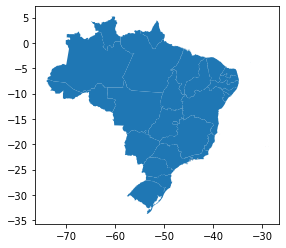

In [350]:
# Atribuindo o shapefile à variável
gdf_brasil_shp = gpd.read_file(r'C:\Users\vinic\Documents\GitHub\Análise_Espacial\Shapefiles\Brasil\UFEBRASIL.shp')

# Verificando a existencia da tiplogia "geometry"
print(gdf_brasil_shp.info() )

print('========================================================================================')

# Plotando uma prévia do shapefile
gdf_brasil_shp.plot()

print('========================================================================================')

print('TIPO : ', type(gdf_brasil_shp))

print('========================================================================================')

print('TAMANHO : ', len(gdf_brasil_shp))

print('========================================================================================')

print('BOUNDS : ', gdf_brasil_shp.bounds)

print('========================================================================================')

print('CRS : ', gdf_brasil_shp.crs)



#CRS retirados de https://epsg.io/?q=brazil
#Transforma para o CRS 5880 que está com unidade em metros

gdf_brasil_shp = gdf_brasil_shp.to_crs(5880)

